In [10]:
import chess
import chess.pgn
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from xgboost import XGBClassifier
import matplotlib.pyplot as plt

In [6]:
class Chess_opening:
    def __init__(self):
        self.opening = {
            'A00': 'Irregular chess opening',
            'A01': 'Nimzovich-Larsen attack',
            'A02': 'Bird opening',
            'A03': 'Bird opening',
            'A04': 'Reti opening',
            'A05': 'Reti opening',
            'A06': 'Reti opening',
            'A07': 'Reti opening',
            'A08': 'Reti opening',
            'A09': 'Reti opening',
            'A10': 'English opening',
            'A11': 'English opening',
            'A12': 'English opening',
            'A13': 'English opening',
            'A14': 'English opening',
            'A15': 'English opening',
            'A16': 'English opening',
            'A17': 'English opening',
            'A18': 'English opening',
            'A19': 'English opening',
            'A20': 'English opening',
            'A21': 'English opening',
            'A22': 'English opening',
            'A23': 'English opening',
            'A24': 'English opening',
            'A25': 'English opening',
            'A26': 'English opening',
            'A27': 'English opening',
            'A28': 'English opening',
            'A29': 'English opening',
            'A30': 'English opening',
            'A31': 'English opening',
            'A32': 'English opening',
            'A33': 'English opening',
            'A34': 'English opening',
            'A35': 'English opening',
            'A36': 'English opening',
            'A37': 'English opening',
            'A38': 'English opening',
            'A39': 'English opening',
            'A40': '1.d4 other',
            'A41': '1.d4 other',
            'A42': '1.d4 other',
            'A43': '1.d4 other',
            'A44': '1.d4 other',
            'A45': '1.d4 other',
            'A46': '1.d4 other',
            'A47': '1.d4 other',
            'A48': '1.d4 other',
            'A49': '1.d4 other',
            'A50': '1.d4 other',
            'A51': 'Budapest gambit',
            'A52': 'Budapest gambit',
            'A53': 'Old Indian defence',
            'A54': 'Old Indian defence',
            'A55': 'Old Indian defence',
            'A56': 'Benoni defense',
            'A57': 'Benko gambit',
            'A58': 'Benko gambit',
            'A59': 'Benko gambit',
            'A60': 'Benoni defense',
            'A61': 'Benoni defense',
            'A62': 'Benoni defense',
            'A63': 'Benoni defense',
            'A64': 'Benoni defense',
            'A65': 'Benoni defense',
            'A66': 'Benoni defense',
            'A67': 'Benoni defense',
            'A68': 'Benoni defense',
            'A69': 'Benoni defense',
            'A70': 'Benoni defense',
            'A71': 'Benoni defense',
            'A72': 'Benoni defense',
            'A73': 'Benoni defense',
            'A74': 'Benoni defense',
            'A75': 'Benoni defense',
            'A76': 'Benoni defense',
            'A77': 'Benoni defense',
            'A78': 'Benoni defense',
            'A79': 'Benoni defense',
            'A80': 'Dutch defense',
            'A81': 'Dutch defense',
            'A82': 'Dutch defense',
            'A83': 'Dutch defense',
            'A84': 'Dutch defense',
            'A85': 'Dutch defense',
            'A86': 'Dutch defense',
            'A87': 'Dutch defense',
            'A88': 'Dutch defense',
            'A89': 'Dutch defense',
            'A90': 'Dutch defense',
            'A91': 'Dutch defense',
            'A92': 'Dutch defense',
            'A93': 'Dutch defense',
            'A94': 'Dutch defense',
            'A95': 'Dutch defense',
            'A96': 'Dutch defense',
            'A97': 'Dutch defense',
            'A98': 'Dutch defense',
            'A99': 'Dutch defense',
            'B00': '1.e4 other',
            'B01': 'Scandinavian defense',
            'B02': 'Alekhine defense',
            'B03': 'Alekhine defense',
            'B04': 'Alekhine defense',
            'B05': 'Alekhine defense',
            'B06': 'Robatsch defense',
            'B07': 'Pirc defense',
            'B08': 'Pirc defense',
            'B09': 'Pirc defense',
            'B10': 'Caro-Kann defense',
            'B11': 'Caro-Kann defense',
            'B12': 'Caro-Kann defense',
            'B13': 'Caro-Kann defense',
            'B14': 'Caro-Kann defense',
            'B15': 'Caro-Kann defense',
            'B16': 'Caro-Kann defense',
            'B17': 'Caro-Kann defense',
            'B18': 'Caro-Kann defense',
            'B19': 'Caro-Kann defense',
            'B20': 'Sicilian defense',
            'B21': 'Sicilian defense',
            'B22': 'Sicilian defense',
            'B23': 'Sicilian defense',
            'B24': 'Sicilian defense',
            'B25': 'Sicilian defense',
            'B26': 'Sicilian defense',
            'B27': 'Sicilian defense',
            'B28': 'Sicilian defense',
            'B29': 'Sicilian defense',
            'B30': 'Sicilian defense',
            'B31': 'Sicilian defense',
            'B32': 'Sicilian defense',
            'B33': 'Sicilian defense',
            'B34': 'Sicilian defense',
            'B35': 'Sicilian defense',
            'B36': 'Sicilian defense',
            'B37': 'Sicilian defense',
            'B38': 'Sicilian defense',
            'B39': 'Sicilian defense',
            'B40': 'Sicilian defense',
            'B41': 'Sicilian defense',
            'B42': 'Sicilian defense',
            'B43': 'Sicilian defense',
            'B44': 'Sicilian defense',
            'B45': 'Sicilian defense',
            'B46': 'Sicilian defense',
            'B47': 'Sicilian defense',
            'B48': 'Sicilian defense',
            'B49': 'Sicilian defense',
            'B50': 'Sicilian defense',
            'B51': 'Sicilian defense',
            'B52': 'Sicilian defense',
            'B53': 'Sicilian defense',
            'B54': 'Sicilian defense',
            'B55': 'Sicilian defense',
            'B56': 'Sicilian defense',
            'B57': 'Sicilian defense',
            'B58': 'Sicilian defense',
            'B59': 'Sicilian defense',
            'B60': 'Sicilian defense',
            'B61': 'Sicilian defense',
            'B62': 'Sicilian defense',
            'B63': 'Sicilian defense',
            'B64': 'Sicilian defense',
            'B65': 'Sicilian defense',
            'B66': 'Sicilian defense',
            'B67': 'Sicilian defense',
            'B68': 'Sicilian defense',
            'B69': 'Sicilian defense',
            'B70': 'Sicilian defense',
            'B71': 'Sicilian defense',
            'B72': 'Sicilian defense',
            'B73': 'Sicilian defense',
            'B74': 'Sicilian defense',
            'B75': 'Sicilian defense',
            'B76': 'Sicilian defense',
            'B77': 'Sicilian defense',
            'B78': 'Sicilian defense',
            'B79': 'Sicilian defense',
            'B80': 'Sicilian defense',
            'B81': 'Sicilian defense',
            'B82': 'Sicilian defense',
            'B83': 'Sicilian defense',
            'B84': 'Sicilian defense',
            'B85': 'Sicilian defense',
            'B86': 'Sicilian defense',
            'B87': 'Sicilian defense',
            'B88': 'Sicilian defense',
            'B89': 'Sicilian defense',
            'B90': 'Sicilian defense',
            'B91': 'Sicilian defense',
            'B92': 'Sicilian defense',
            'B93': 'Sicilian defense',
            'B94': 'Sicilian defense',
            'B95': 'Sicilian defense',
            'B96': 'Sicilian defense',
            'B97': 'Sicilian defense',
            'B98': 'Sicilian defense',
            'B99': 'Sicilian defense',
            'C00': 'French defense',
            'C01': 'French defense',
            'C02': 'French defense',
            'C03': 'French defense',
            'C04': 'French defense',
            'C05': 'French defense',
            'C06': 'French defense',
            'C07': 'French defense',
            'C08': 'French defense',
            'C09': 'French defense',
            'C10': 'French defense',
            'C11': 'French defense',
            'C12': 'French defense',
            'C13': 'French defense',
            'C14': 'French defense',
            'C15': 'French defense',
            'C16': 'French defense',
            'C17': 'French defense',
            'C18': 'French defense',
            'C19': 'French defense',
            'C20': '1.e4 e5 other',
            'C21': 'Center game',
            'C22': 'Center game',
            'C23': 'Bishop opening',
            'C24': 'Bishop opening',
            'C25': 'Vienna game',
            'C26': 'Vienna game',
            'C27': 'Vienna game',
            'C28': 'Vienna game',
            'C29': 'Vienna game',
            'C30': 'King gambit',
            'C31': 'King gambit',
            'C32': 'King gambit',
            'C33': 'King gambit',
            'C34': 'King gambit',
            'C35': 'King gambit',
            'C36': 'King gambit',
            'C37': 'King gambit',
            'C38': 'King gambit',
            'C39': 'King gambit',
            'C40': '1.e4 e5 2.Sf3 other',
            'C41': 'Philidor defense',
            'C42': 'Petrov defense',
            'C43': 'Petrov defense',
            'C44': '1.e4 e5 2.Sf3 Sc6 other',
            'C45': 'Scotch game',
            'C46': 'Three knights game',
            'C47': 'Four knights game',
            'C48': 'Four knights game',
            'C49': 'Four knights game',
            'C50': 'Giuoco Piano',
            'C51': 'Giuoco Piano',
            'C52': 'Giuoco Piano',
            'C53': 'Giuoco Piano',
            'C54': 'Giuoco Piano',
            'C55': 'Two knights game',
            'C56': 'Two knights game',
            'C57': 'Two knights game',
            'C58': 'Two knights game',
            'C59': 'Two knights game',
            'C60': 'Ruy Lopez',
            'C61': 'Ruy Lopez',
            'C62': 'Ruy Lopez',
            'C63': 'Ruy Lopez',
            'C64': 'Ruy Lopez',
            'C65': 'Ruy Lopez',
            'C66': 'Ruy Lopez',
            'C67': 'Ruy Lopez',
            'C68': 'Ruy Lopez',
            'C69': 'Ruy Lopez',
            'C70': 'Ruy Lopez',
            'C71': 'Ruy Lopez',
            'C72': 'Ruy Lopez',
            'C73': 'Ruy Lopez',
            'C74': 'Ruy Lopez',
            'C75': 'Ruy Lopez',
            'C76': 'Ruy Lopez',
            'C77': 'Ruy Lopez',
            'C78': 'Ruy Lopez',
            'C79': 'Ruy Lopez',
            'C80': 'Ruy Lopez',
            'C81': 'Ruy Lopez',
            'C82': 'Ruy Lopez',
            'C83': 'Ruy Lopez',
            'C84': 'Ruy Lopez',
            'C85': 'Ruy Lopez',
            'C86': 'Ruy Lopez',
            'C87': 'Ruy Lopez',
            'C88': 'Ruy Lopez',
            'C89': 'Ruy Lopez',
            'C90': 'Ruy Lopez',
            'C91': 'Ruy Lopez',
            'C92': 'Ruy Lopez',
            'C93': 'Ruy Lopez',
            'C94': 'Ruy Lopez',
            'C95': 'Ruy Lopez',
            'C96': 'Ruy Lopez',
            'C97': 'Ruy Lopez',
            'C98': 'Ruy Lopez',
            'C99': 'Ruy Lopez',
            'D00': '1.d4 d5 other',
            'D01': 'Queen pawn game',
            'D02': 'Queen pawn game',
            'D03': 'Queen pawn game',
            'D04': 'Queen pawn game',
            'D05': 'Queen pawn game',
            'D06': 'Queen gambit other',
            'D07': 'Chigorin defense',
            'D08': 'Albin countergambit',
            'D09': 'Albin countergambit',
            'D10': 'Slav defense',
            'D11': 'Slav defense',
            'D12': 'Slav defense',
            'D13': 'Slav defense',
            'D14': 'Slav defense',
            'D15': 'Slav defense',
            'D16': 'Slav defense',
            'D17': 'Slav defense',
            'D18': 'Slav defense',
            'D19': 'Slav defense',
            'D20': 'Queen gambit accepted',
            'D21': 'Queen gambit accepted',
            'D22': 'Queen gambit accepted',
            'D23': 'Queen gambit accepted',
            'D24': 'Queen gambit accepted',
            'D25': 'Queen gambit accepted',
            'D26': 'Queen gambit accepted',
            'D27': 'Queen gambit accepted',
            'D28': 'Queen gambit accepted',
            'D29': 'Queen gambit accepted',
            'D30': 'Queen gambit declined',
            'D31': 'Queen gambit declined',
            'D32': 'Queen gambit declined',
            'D33': 'Queen gambit declined',
            'D34': 'Queen gambit declined',
            'D35': 'Queen gambit declined',
            'D36': 'Queen gambit declined',
            'D37': 'Queen gambit declined',
            'D38': 'Queen gambit declined',
            'D39': 'Queen gambit declined',
            'D40': 'Queen gambit declined',
            'D41': 'Queen gambit declined',
            'D42': 'Queen gambit declined',
            'D43': 'Queen gambit declined',
            'D44': 'Queen gambit declined',
            'D45': 'Queen gambit declined',
            'D46': 'Queen gambit declined',
            'D47': 'Queen gambit declined',
            'D48': 'Queen gambit declined',
            'D49': 'Queen gambit declined',
            'D50': 'Queen gambit declined',
            'D51': 'Queen gambit declined',
            'D52': 'Queen gambit declined',
            'D53': 'Queen gambit declined',
            'D54': 'Queen gambit declined',
            'D55': 'Queen gambit declined',
            'D56': 'Queen gambit declined',
            'D57': 'Queen gambit declined',
            'D58': 'Queen gambit declined',
            'D59': 'Queen gambit declined',
            'D60': 'Queen gambit declined',
            'D61': 'Queen gambit declined',
            'D62': 'Queen gambit declined',
            'D63': 'Queen gambit declined',
            'D64': 'Queen gambit declined',
            'D65': 'Queen gambit declined',
            'D66': 'Queen gambit declined',
            'D67': 'Queen gambit declined',
            'D68': 'Queen gambit declined',
            'D69': 'Queen gambit declined',
            'D70': 'Grunfeld defense',
            'D71': 'Grunfeld defense',
            'D72': 'Grunfeld defense',
            'D73': 'Grunfeld defense',
            'D74': 'Grunfeld defense',
            'D75': 'Grunfeld defense',
            'D76': 'Grunfeld defense',
            'D77': 'Grunfeld defense',
            'D78': 'Grunfeld defense',
            'D79': 'Grunfeld defense',
            'D80': 'Grunfeld defense',
            'D81': 'Grunfeld defense',
            'D82': 'Grunfeld defense',
            'D83': 'Grunfeld defense',
            'D84': 'Grunfeld defense',
            'D85': 'Grunfeld defense',
            'D86': 'Grunfeld defense',
            'D87': 'Grunfeld defense',
            'D88': 'Grunfeld defense',
            'D89': 'Grunfeld defense',
            'D90': 'Grunfeld defense',
            'D91': 'Grunfeld defense',
            'D92': 'Grunfeld defense',
            'D93': 'Grunfeld defense',
            'D94': 'Grunfeld defense',
            'D95': 'Grunfeld defense',
            'D96': 'Grunfeld defense',
            'D97': 'Grunfeld defense',
            'D98': 'Grunfeld defense',
            'D99': 'Grunfeld defense',
            'E00': 'Catalan defense',
            'E01': 'Catalan defense',
            'E02': 'Catalan defense',
            'E03': 'Catalan defense',
            'E04': 'Catalan defense',
            'E05': 'Catalan defense',
            'E06': 'Catalan defense',
            'E07': 'Catalan defense',
            'E08': 'Catalan defense',
            'E09': 'Catalan defense',
            'E10': 'Blumenfeld gambit ',
            'E11': 'Bogo-Indian defence',
            'E12': 'Queen Indian defense',
            'E13': 'Queen Indian defense',
            'E14': 'Queen Indian defense',
            'E15': 'Queen Indian defense',
            'E16': 'Queen Indian defense',
            'E17': 'Queen Indian defense',
            'E18': 'Queen Indian defense',
            'E19': 'Queen Indian defense',
            'E20': 'Nimzowitsch defense',
            'E21': 'Nimzowitsch defense',
            'E22': 'Nimzowitsch defense',
            'E23': 'Nimzowitsch defense',
            'E24': 'Nimzowitsch defense',
            'E25': 'Nimzowitsch defense',
            'E26': 'Nimzowitsch defense',
            'E27': 'Nimzowitsch defense',
            'E28': 'Nimzowitsch defense',
            'E29': 'Nimzowitsch defense',
            'E30': 'Nimzowitsch defense',
            'E31': 'Nimzowitsch defense',
            'E32': 'Nimzowitsch defense',
            'E33': 'Nimzowitsch defense',
            'E34': 'Nimzowitsch defense',
            'E35': 'Nimzowitsch defense',
            'E36': 'Nimzowitsch defense',
            'E37': 'Nimzowitsch defense',
            'E38': 'Nimzowitsch defense',
            'E39': 'Nimzowitsch defense',
            'E40': 'Nimzowitsch defense',
            'E41': 'Nimzowitsch defense',
            'E42': 'Nimzowitsch defense',
            'E43': 'Nimzowitsch defense',
            'E44': 'Nimzowitsch defense',
            'E45': 'Nimzowitsch defense',
            'E46': 'Nimzowitsch defense',
            'E47': 'Nimzowitsch defense',
            'E48': 'Nimzowitsch defense',
            'E49': 'Nimzowitsch defense',
            'E50': 'Nimzowitsch defense',
            'E51': 'Nimzowitsch defense',
            'E52': 'Nimzowitsch defense',
            'E53': 'Nimzowitsch defense',
            'E54': 'Nimzowitsch defense',
            'E55': 'Nimzowitsch defense',
            'E56': 'Nimzowitsch defense',
            'E57': 'Nimzowitsch defense',
            'E58': 'Nimzowitsch defense',
            'E59': 'Nimzowitsch defense',
            'E60': 'King Indian defence',
            'E61': 'King Indian defence',
            'E62': 'King Indian defence',
            'E63': 'King Indian defence',
            'E64': 'King Indian defence',
            'E65': 'King Indian defence',
            'E66': 'King Indian defence',
            'E67': 'King Indian defence',
            'E68': 'King Indian defence',
            'E69': 'King Indian defence',
            'E70': 'King Indian defence',
            'E71': 'King Indian defence',
            'E72': 'King Indian defence',
            'E73': 'King Indian defence',
            'E74': 'King Indian defence',
            'E75': 'King Indian defence',
            'E76': 'King Indian defence',
            'E77': 'King Indian defence',
            'E78': 'King Indian defence',
            'E79': 'King Indian defence',
            'E80': 'King Indian defence',
            'E81': 'King Indian defence',
            'E82': 'King Indian defence',
            'E83': 'King Indian defence',
            'E84': 'King Indian defence',
            'E85': 'King Indian defence',
            'E86': 'King Indian defence',
            'E87': 'King Indian defence',
            'E88': 'King Indian defence',
            'E89': 'King Indian defence',
            'E90': 'King Indian defence',
            'E91': 'King Indian defence',
            'E92': 'King Indian defence',
            'E93': 'King Indian defence',
            'E94': 'King Indian defence',
            'E95': 'King Indian defence',
            'E96': 'King Indian defence',
            'E97': 'King Indian defence',
            'E98': 'King Indian defence',
            'E99': 'King Indian defence',
        }
        self.opening_name = {}
        for eco, name in self.opening.items():
            if name in self.opening_name:
                self.opening_name[name].append(eco)
            else:
                self.opening_name[name] = [eco]

    def get_eco(self, opening_name):
        if opening_name in self.opening_name:
            return self.opening_name[opening_name]
        else:
            return []

In [7]:
class Data:
    def __init__(self, opening_ecos):
        self.opening_ecos = opening_ecos
    
    def extract_game_data(self, game):
        headers = game.headers
        white_elo = int(headers.get('WhiteElo', 0))
        black_elo = int(headers.get('BlackElo', 0))
        result = headers.get('Result', 'N/A')
        eco = headers.get('ECO', 'N/A')
        if result == '0-1':
            result_numeric = 0
        elif result == '1/2-1/2':
            result_numeric = 1
        elif result == '1-0':
            result_numeric = 2
        else: 
            result_numeric = 'N/A'
        return white_elo, black_elo, result_numeric, eco

    def game_data(self, pgn_file):
        white_elo_list = []
        black_elo_list = []
        result_list = []
        eco_list = []
        while True:
            game = chess.pgn.read_game(pgn_file)
            if game is None:
                break
            white_elo, black_elo, result, eco = self.extract_game_data(game)
            white_elo_list.append(white_elo)
            black_elo_list.append(black_elo)
            result_list.append(result)
            eco_list.append(eco)
        return white_elo_list, black_elo_list, result_list, eco_list

    def get_data(self, pgn_file):
        with open(pgn_file, 'r') as pgn_file:
            potential_white_elo, potential_black_elo, potential_result, potential_eco = self.game_data(pgn_file)
        potential_data = np.array([np.array(i) for i in zip(potential_white_elo, potential_black_elo, potential_result, potential_eco)])
        return potential_data
    
    def clear_data(self, pgn_file):
        potential_data = self.get_data(pgn_file)
        white_potential_data = potential_data[:,0].astype(int)
        black_potential_data = potential_data[:,1].astype(int)
        result_potential_data = potential_data[:,2].astype(int)
        eco_potential_data = potential_data[:,3].astype(str)
        return white_potential_data, black_potential_data, result_potential_data, eco_potential_data
    
    def elo_boundary(self, sample_white_elo, sample_black_elo, fitting_coefficient):
        min_white_value = np.floor(sample_white_elo / fitting_coefficient) * fitting_coefficient - fitting_coefficient
        min_black_value = np.floor(sample_black_elo / fitting_coefficient) * fitting_coefficient - fitting_coefficient
        max_white_value = np.ceil(sample_white_elo / fitting_coefficient) * fitting_coefficient + fitting_coefficient
        max_black_value = np.ceil(sample_black_elo / fitting_coefficient) * fitting_coefficient + fitting_coefficient
        return min_white_value, min_black_value, max_white_value, max_black_value
    
    def filter_data(self, pgn_file, sample_white_elo, sample_black_elo, fitting_coefficient):
        white_potential_data, black_potential_data, result_potential_data, eco_potential_data = self.clear_data(pgn_file)
        min_white_value, min_black_value, max_white_value, max_black_value = self.elo_boundary(sample_white_elo,sample_black_elo,fitting_coefficient)
        full_data = []
        for (white_elo, black_elo, result, eco) in zip(white_potential_data, black_potential_data, result_potential_data, eco_potential_data):
            if eco in self.opening_ecos:
                if min_white_value <= white_elo <= max_white_value:
                    if min_black_value <= black_elo <= max_black_value:
                        full_data.append([white_elo, black_elo, result])
        full_data = np.array(full_data)
        return full_data
    
    def get_train_and_test_data(self, pgn_file, sample_white_elo, sample_black_elo, fitting_coefficient):
        full_data = self.filter_data(pgn_file, sample_white_elo, sample_black_elo, fitting_coefficient)
        X = np.array([full_data[:,0], full_data[:,1]])
        X = list(zip(X[0], X[1]))
        y = list(full_data[:,2])
        return X,y

In [52]:
if __name__ == "__main__":
    train_file_path = 'C:\\Users\\KK\\Master Thesis\\dane\\database.pgn'
    test_file_path = 'C:\\Users\\KK\\Master Thesis\\dane\\twic1521.pgn'
    
    opening_name = "Sicilian defense"
    sample_white_elo = 2400
    sample_black_elo = 2367

    opening = Chess_opening()
    opening_ecos = opening.get_eco(opening_name)
    
    data = Data(opening_ecos)
    
    fitting_coefficient = 100
    X_train, y_train = data.get_train_and_test_data(train_file_path, sample_white_elo, sample_black_elo,fitting_coefficient)
    X_validate, X_test_validate, y_validate, y_test_validate = train_test_split(X_train, y_train, train_size=0.8, test_size=0.2, random_state=42)
    X_test, y_test = data.get_train_and_test_data(test_file_path, sample_white_elo, sample_black_elo,fitting_coefficient)

illegal san: 'Nxf3' in rnbqkbnr/pppppppp/8/8/8/2N5/PPPPPPPP/R1BQKBNR b KQkq - 1 1 while parsing <Game at 0x1fc5ddf8100 ('Lecomte,Robin' vs. 'Kalle,Erwin', '2023.03.11' at 'Netherlands NED')>


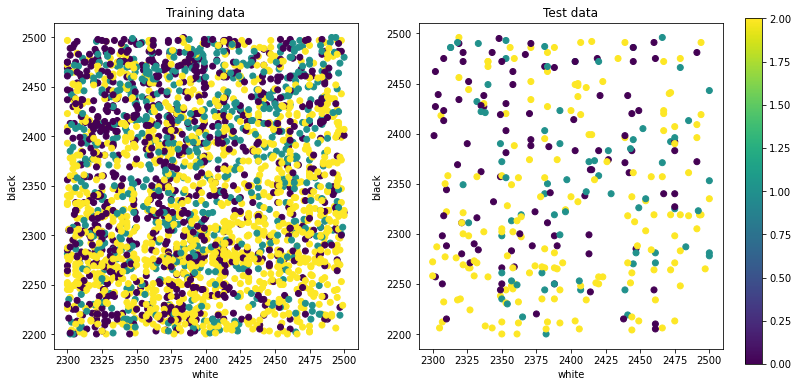

In [53]:
X_train_plot = list(zip(*X_train))
X_test_plot = list(zip(*X_test))

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

sc1 = axs[0].scatter(X_train_plot[0], X_train_plot[1], c=y_train)
axs[0].set_title('Training data')
axs[0].set_xlabel('white')
axs[0].set_ylabel('black')


sc2 = axs[1].scatter(X_test_plot[0], X_test_plot[1], c=y_test)
axs[1].set_title('Test data')
axs[1].set_xlabel('white')
axs[1].set_ylabel('black')

cax = fig.add_axes([0.925, 0.09, 0.02, 0.8])
cbar2 = plt.colorbar(sc2, cax=cax)
cbar2.set_label('')



In [89]:
    X_validate, X_test_validate, y_validate, y_test_validate = train_test_split(X_train, y_train, train_size=0.8, test_size=0.2, random_state=42)
    X_test, y_test = data.get_train_and_test_data(test_file_path, sample_white_elo, sample_black_elo,fitting_coefficient)

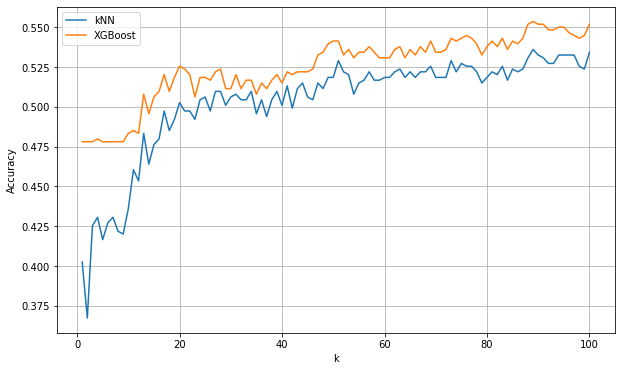

In [111]:
k_values = range(1, 101)

knn_accuracies = []
xgb_accuracies = []

for k in k_values:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_validate, y_validate)
    knn_predictions = knn_model.predict(X_test_validate)
    knn_accuracy = accuracy_score(y_test_validate, knn_predictions)
    knn_accuracies.append(knn_accuracy)

    xgb_model = xgb.train(param, xgb.DMatrix(knn_predictions.reshape(-1, 1), label=y_test_validate), num_boost_round=10)
    dtest = xgb.DMatrix(knn_model.predict(X_test_validate).reshape(-1, 1), label=y_test_validate)
    xgb_predictions = xgb_model.predict(dtest)
    xgb_accuracy = accuracy_score(y_test_validate, xgb_predictions)
    xgb_accuracies.append(xgb_accuracy)

plt.figure(figsize=(10, 6))
plt.plot(k_values, knn_accuracies, label='kNN')
plt.plot(k_values, xgb_accuracies, label='XGBoost')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()
